# Clinical and Imaging Analyses to Predict Alzheimer's Disease

Alzheimer’s disease is a neurodegenerative disease that involves the death of neurons within the brain. According to the Alzheimer’s Association, over 5 million people suffer from Alzheimer’s in the United States, and it is estimated to increase to 14 million by 2050. Therefore, being able to predict and identify factors that influence Alzheimer’s progression as well as being able to identify which stage of the disease’s progression a patient is affected by is becoming more essential.

## <u>The Experimental Approaches and Resulting Data </u>

The data utilized in the analyses are from 3 separate data sets. Note that the term "demented" is used to describe a participant affected by Alzheimer's Disease.

a. The first [data set](https://www.kaggle.com/jboysen/mri-and-alzheimers) consists of clinical measurements and MRI measurements (note: not images) from a cross-sectional study. Participants were young or middle aged, and nondemented or demented older adults. This was used to try to predict which individuals are affected by Alzheimer's disease as well as to identify which clinical measurements contribute to this prediction.

b. The second [data set](https://www.kaggle.com/jboysen/mri-and-alzheimers) consists of clinical measurements and MRI measurements (note: not images) from from a longitudinal study. Participants were non-demented and demented older adults that were imaged at least 2 times in subsequent visits that spanned at least 1 year. This information was used to try to predict which individual are affected or will become affected by Alzheimer's Disease.

c. The third [data set](https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images?select=Alzheimer_s+Dataset) consists of MRI images that classifies Alzheimer’s and Dementia patients into 4 classes (non-demented, very mildly demented, mildly demented, and moderately demented). These images were to attempt to identify which stage of Alzheimer's Disease a patient is affected by.

### Data Wrangling and Initial Findings - a

The cross-sectional study performed clinical assesments and examined MRI images of 436 participants. Table 1 describes the variables determined in the study. Table 2 further decribes how the MMSE variable was defined.

#### Table 1:  Description of Variables in Cross-Sectional Alzheimer's Data Set

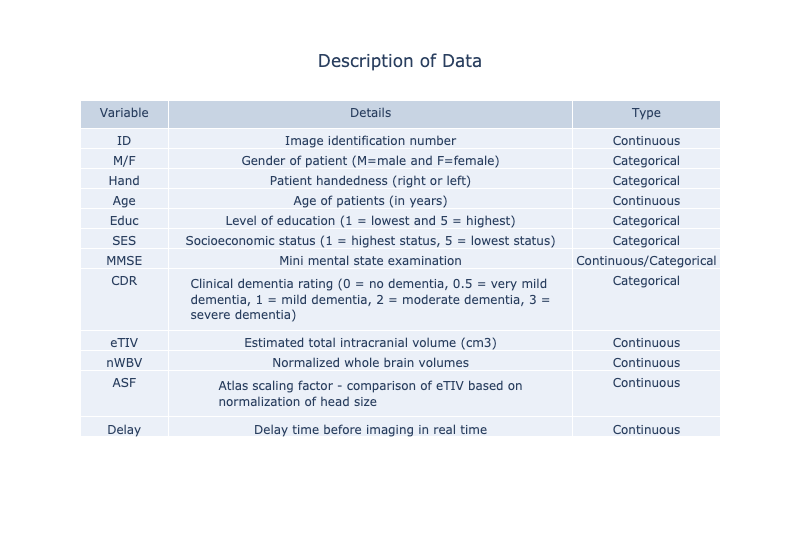

#### Table 2:  Description of Mini-Mental State Examination (MMSE) Scoring Cutoffs

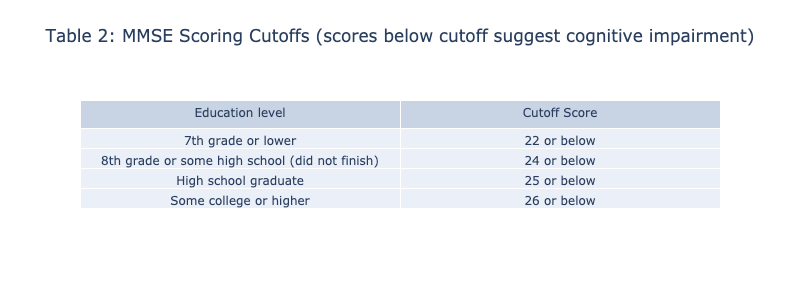

Within the dataset, 201 rows out of 436 rows were missing values for the 'Educ', 'SES', 'MMSE', and 'CDR' features. These rows were removed from the dataset because it accounted for almost half of the dataset and the variables were categorical. Filling the missing values with the mode or median would have skewed the data.

There were 19 other rows that had missing values for the 'SES' feature. These missing values were filled with the mode value for the feature, as socioeconomic status was represented as a categorical value.

Also, 416 of the 436 rows were missing values for the 'Delay' column. This measurement was for when the images were taken, and because it and the 'ID' feature are nonessential features, these columns were dropped.

The dataset will be used to try to predict which category of Alzheimer's Disease a participant belongs to. The CDR value represents the level of dementia a participant was grouped into; therefore, it is the variable that was used to determine these groups.

Using the 'CDR' feature, the data could then be classified into 4 groups (see Figure 1):

1. 0 = no dementia
2. 0.5 = very mild dementia
3. 1 = mild dementia
4. 2 = moderate dementia

#### Figure 1: Number of Participants in Each Alzheimer's Group

More participants are within the Non-demented group (CDR 0) than the other groups. As CDR level increases and thus severity of Alzheimer's increases, the number of participants decreases.

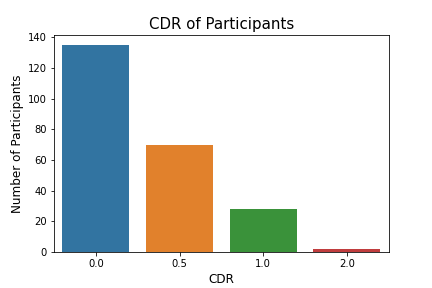

To begin to address which features could affect whether an individual is affected by Alzheimer's Disease, we can look at the relationship between the CDR feature and the other features. Figures 2-5 address these relationships.

#### Figure 2: Number of Participants in Each Education Level Based on CDR Group.

The highest education level is 5; whereas, the lowest education level is 1. Further studies could look into the general trend that as education level increases, the severity of CDR decreases. There are other confounding factors that could account for this trend that are not included in this study, including to access to healthcare services to participate in the study.

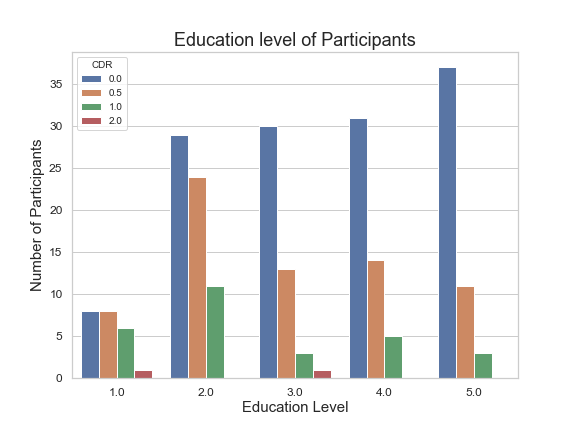

#### Figure 3: Number of Participants in Each Socioeconomic Group Based on CDR Group.

The highest socioeconomic level is 1; whereas, the lowest level is 5. Again, further studies could look into the general trend that as socioeconomic level decreases, the severity of CDR increases. Similar to education level, there are other confounding factors that could account for this trend that are not included in this study, including to access to healthcare services to participate in the study.

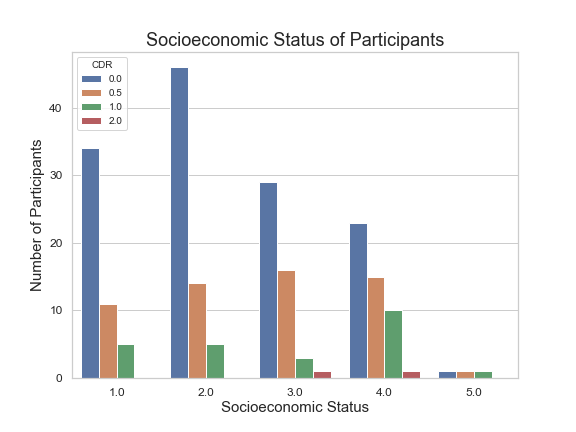

#### Figure 4: Average Mini-mental State Examination Score for Each CDR Group.

The Mini-mental State Examination (MMSE) score measures cognitive impairment based on education level. The higher the MMSE score the less cognitive impairment. As CDR level increases, and thus the severity of Alzheimer's Disease, the lower the average MMSE score.

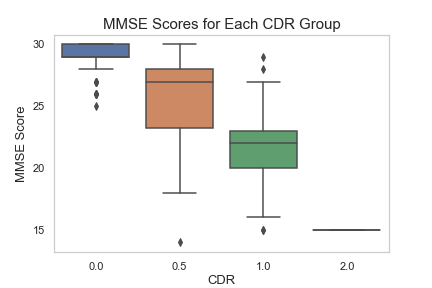

#### Figure 5: Average Normalized Whole Brain Volume for Each CDR Group.

The normalized whole brain volume(nWBV) value measures the percentage of the total white and gray matter voxels of the brain image within the estimated total intracranial volume. As the severity of Alzheimer's Disease increases, the nWBV decreases.

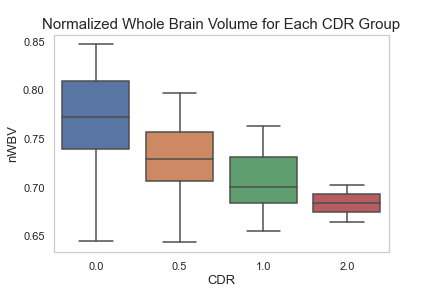

It should be noted that because there were very few participants with a CDR of 2 (2 participants), these participants were removed from the dataset. When split into training and testing groups, it was often the case that there were 0 participants with a CDR of 2 in the testing set. This then affected the analyses.

### Modeling to predict CDR Group - a

Is it possible to predict CDR values (Alzheimer's severity) given several features, including: a) Education, b) Socioeconomic status, c) MMSE scores, and d) normalized whole brain volume (see Table 1)? Given the initial findings above, four models were examined with the goal of forming a low-complexity model that can predict which CDR group participants will be classified as given the features listed in Table 1.

The models tested were:
1. K-nearest neighbors - assumes that similar groups will be in close proximity to each other
2. Random Forest - Randomized decision trees classify a participant as CDR 0 decision/classification with the highest number from all of the trees will be used.
3. One vs Rest - splits a multi-class classification into one binary classification problem per class, where one class is positive and the rest are negative. OVR splits the dataset into binary classification problems. Then, a binary classifier is trained on each binary classification problem and predictions are made using the best performing model.

    a. Logistic Regression - describes how independent variables affect participant classification
    
    b. Multi-layer Perceptron (MLP)/Deep Neural Network - uses an underlying Neural Network to classify participants
    
The performances of the models will be compared with each other to find the best performing model in predicting CDR groups.

#### Model Comparison

After splitting and training the data, the models were tuned. It was determined that for the KNN Model the optimal k value was 3. For the Random Forest Model, the n_estimators citerion was determined to be 56. The C value for the One vs. Rest (Logistic Regression) modeled was determined to be 1200. Finally, the hidden layers sizes for the One vs. Rest (MLP) model were determined to be (20, 30, 20). The performance of the models was then assessed with the test data. 

Figures 6 shows the confusion matrices of the four models.

#### Figure 6: Confusion Matrices for the Tested Models

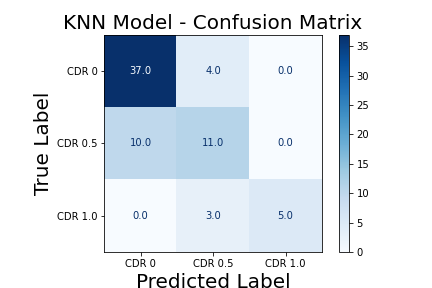

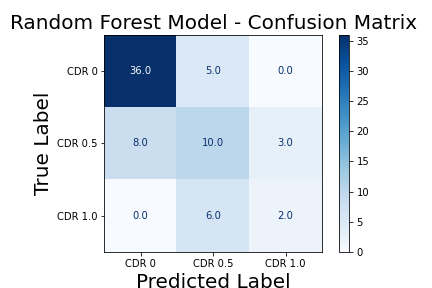

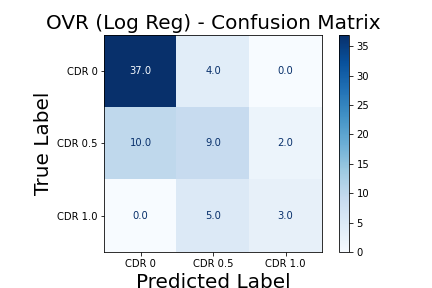

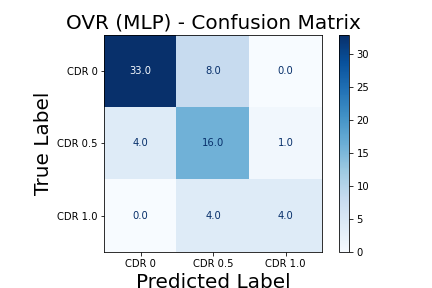

Using the prediction information from the models above, several metrics were calculated to determine which model would perform better. 

The model will be chosen based on the following criteria:
1. Higher Precision
2. Higher Recall
3. Higher F1 Score
4. Higher Accuracy

It should be noted that the accuracy metric was considered last, as the accuracy of one CDR class could influence the overall accuracy of the model.

Table 3 provides a summary of the above metrics for the four models.

#### Table 3: Metrics Comparing the Four Models Tested

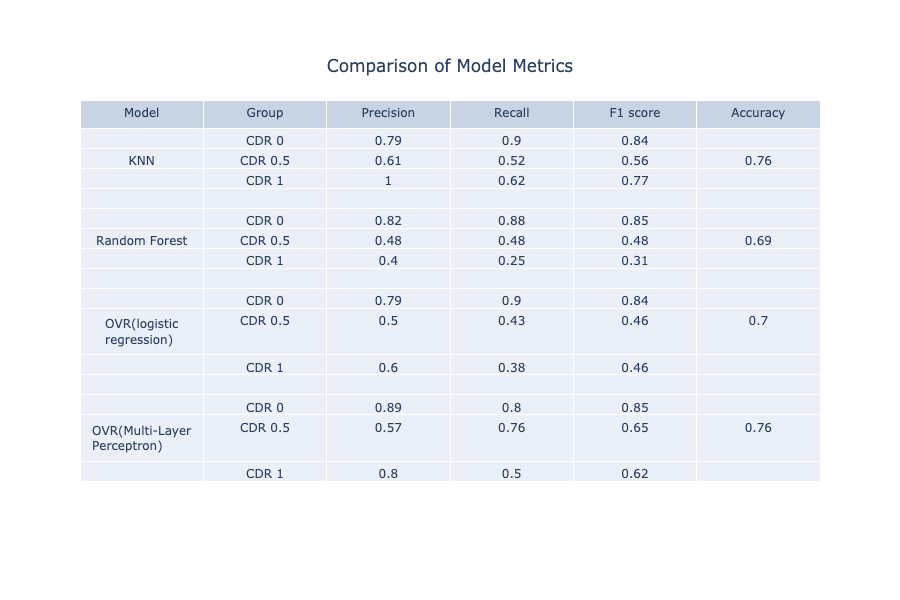

Based on the above metrics, it seems as if the KNN model and the One vs. Rest (Multi-Layer Perceptron) model perform better than the Random Forest model and One vs. Rest (Logistic Regression) model. Of the two models that perfrom well, the KNN model would be recommended, as it performs slightly better than the One vs. Rest (MLP) model.

#### Identifying important features that influence Alzheimer's Disease

Using the Random Forest Model, the features that influence participant class can be identified.

The top 2 features that influence participant class are:
1. MMSE - Mini mental state examination
2. nWBV - Normalized whole brain volumes

### Data Wrangling and Initial Findings - b

The longitudinal study performed clinical assesments and examined MRI images of 373 participants. Table 4 describes the variables determined in the study. Table 2 above further decribes how the MMSE variable was defined.

#### Table 4:  Description of Variables in Longitudinal Alzheimer's Data Set

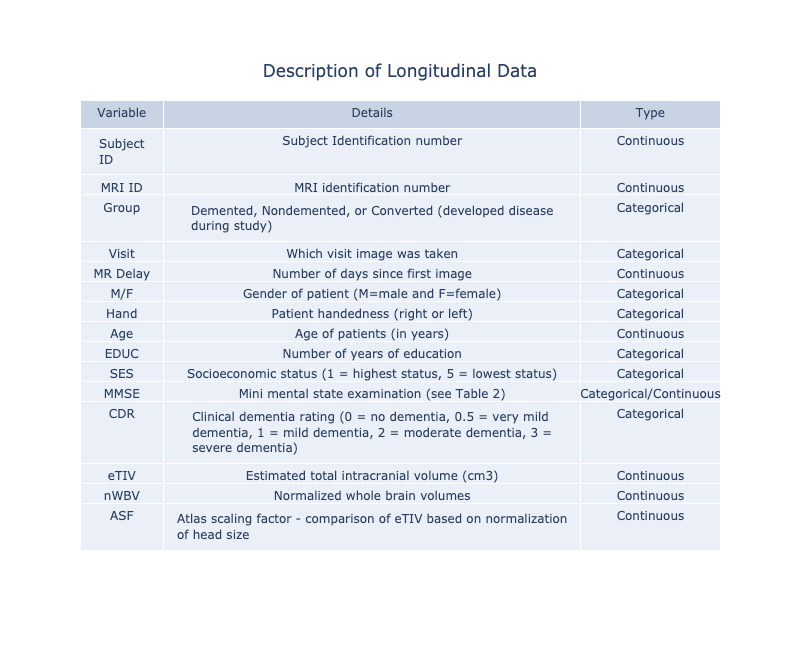

Within the dataset, there were 19 missing values for the 'SES'features, and 2 missing values for the 'MMSE' feature. These missing values were filled with the mode value for the feature, as they were represented as categorical values and continuous values.

The 'Subject ID' and 'MRI ID' features are nonessential features, so these columns were dropped.

The dataset will be used to try to predict which category of Alzheimer's Disease a participant belongs to. The Group value represents the group each participant was classified as; therefore, it is the variable that was used to predict Alzheimer's.

Using the 'Group' feature, the data could then be classified into 3 groups (see Figure 1):

1. Nondemented = control group with no Alzheimer's
2. Demented = participants with Alzheimer's
3. Converted = participants who developed Alzheimer's during the study time frame.

#### Figure 7: Number of Participants in Each Alzheimer's Group

More participants are within the Non-demented group than the other groups, where the participants in the Demented group are close in number to the control group. The Converted group has the fewest number of participants.

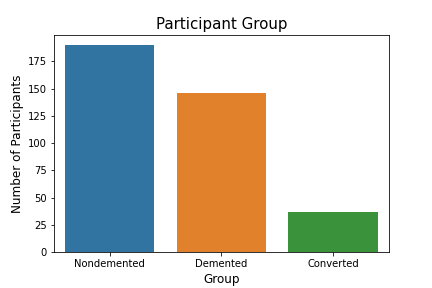

#### Figure 8: Number of Participants in Each Education Level Based on Group.

The majority of the participants finished at least high school (12 or higher), with many continuing and/or finishing college or graduate degrees (16 or higher). Further studies could look into the general trend that as education level increases, there are fewer participants with Alzheimer's Disease. There are other confounding factors that could account for this trend that are not included in this study, including to access to healthcare services to participate in the study.

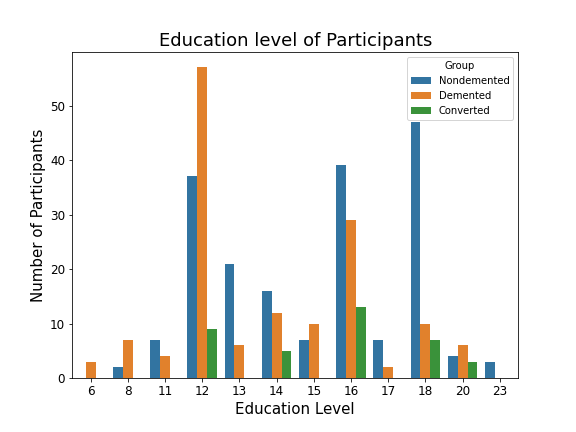

#### Figure 9: Number of Participants in Each Socioeconomic Group Based on Group.

The highest socioeconomic level is 1; whereas, the lowest level is 5. There does not appear to be a general trend among the groups and socioeconomic status.

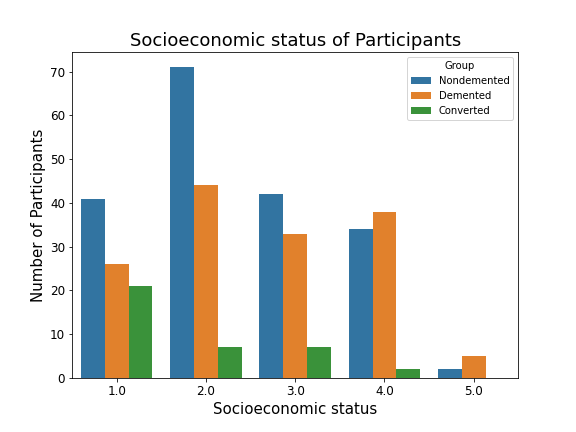

#### Figure 10: Average Mini-mental State Examination Score for Each Group.

The Mini-mental State Examination (MMSE) score measures cognitive impairment based on education level. The higher the MMSE score the less cognitive impairment. The participants in the Demented Group display a significant reduction in MMSE scores compared with the Non-Demented and Converted groups. The Converted group displays a reduction in MMSE scores compared with the Non-demented group.

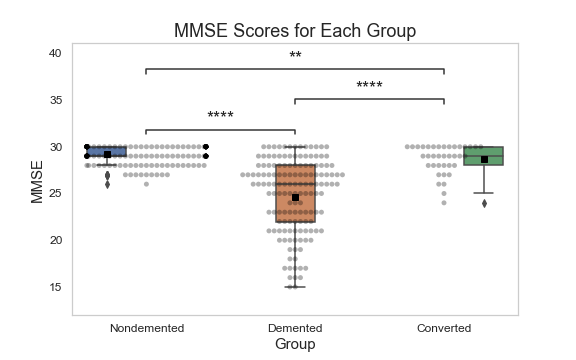

#### Figure 11: Average Normalized Whole Brain Volume for Each Group.

The normalized whole brain volume(nWBV) value measures the percentage of the total white and gray matter voxels of the brain image within the estimated total intracranial volume. There is a significant differece in nWBV values between Non-demented and Demented groups, and a slight significance difference between the Non-demented and Converted groups. There is no difference between the Demented and Converted groups.

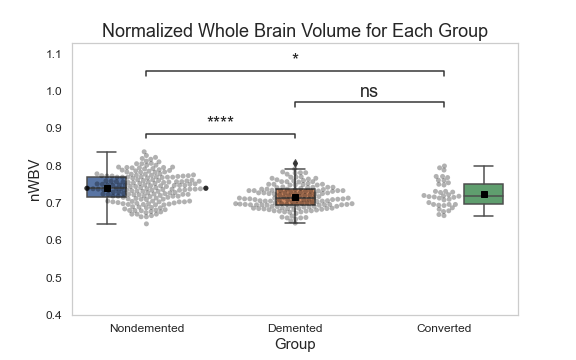

### Modeling to predict Alzheimer Group - b

Is it possible to predict Alzheimer Group in a longitudinal study that measures several features, including: a) CDR, b) Socioeconomic status, c) MMSE scores, and d) normalized whole brain volume (see Table 4)? Given the initial findings above, four models were examined with the goal of forming a low-complexity model that can predict which Alzheimer group participants will be classified as given the features listed in Table 4.

The models tested were:
1. K-nearest neighbors - assumes that similar groups will be in close proximity to each other
2. Random Forest - Randomized decision trees classify a participant as CDR 0 decision/classification with the highest number from all of the trees will be used.
3. One vs Rest - splits a multi-class classification into one binary classification problem per class, where one class is positive and the rest are negative. OVR splits the dataset into binary classification problems. Then, a binary classifier is trained on each binary classification problem and predictions are made using the best performing model.

    a. Logistic Regression - describes how independent variables affect participant classification
    
    b. Multi-layer Perceptron (MLP)/Deep Neural Network - uses an underlying Neural Network to classify participants
    
The performances of the models will be compared with each other to find the best performing model in predicting Alzheimer groups.

#### Model Comparison

After splitting and training the data, the models were tuned. It was determined that for the KNN Model the optimal k value was 3. For the Random Forest Model, the n_estimators citerion was determined to be 89. The C value for the One vs. Rest (Logistic Regression) modeled was determined to be 19. Finally, the hidden layers sizes for the One vs. Rest (MLP) model were determined to be (30, 30, 30). The performance of the models was then assessed with the test data. 

Figures 16 shows the confusion matrices of the four models.

#### Figure 12: Confusion Matrices for the Tested Models

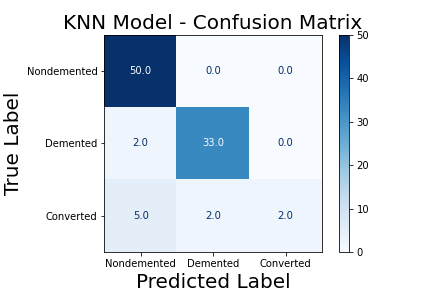

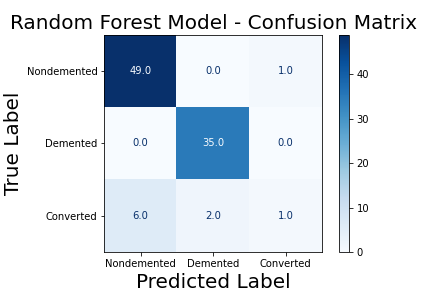

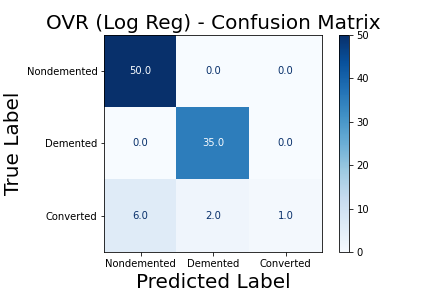

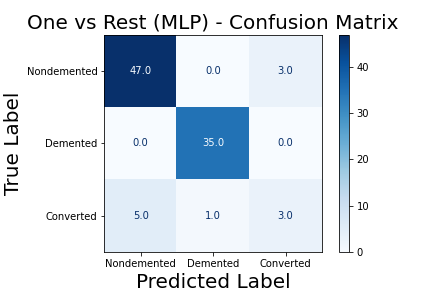

Using the prediction information from the models above, several metrics were calculated to determine which model would perform better. 

The model will be chosen based on the following criteria:
1. Higher Precision
2. Higher Recall
3. Higher F1 Score
4. Higher Accuracy

It should be noted that the accuracy metric was considered last, as the accuracy of one Alzheimer Group could influence the overall accuracy of the model.

Table 5 provides a summary of the above metrics for the four models.

#### Table 4: Metrics Comparing the Four Models Tested

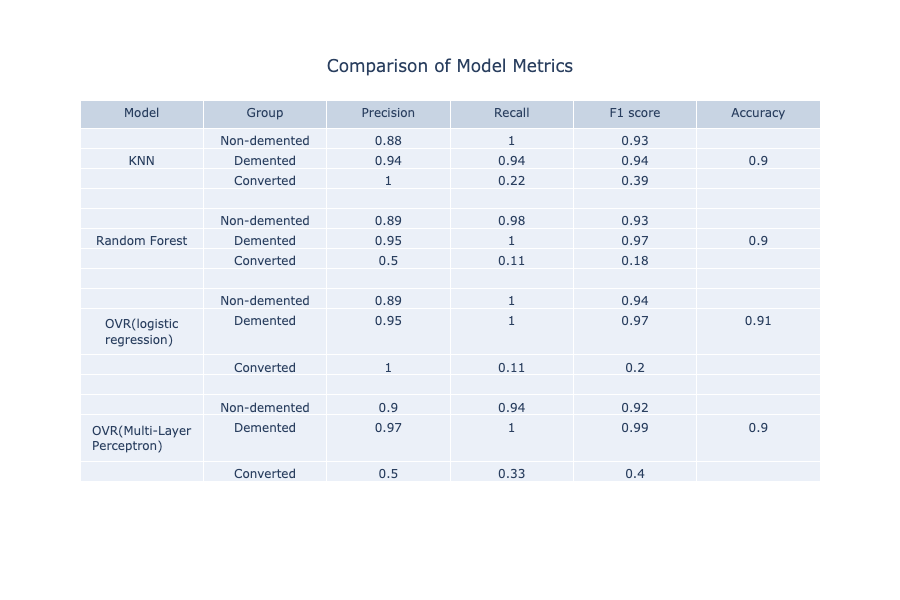

Based on the above metrics, it seems as if the KNN model and the One vs. Rest (Multi-Layer Perceptron) model perform better than the Random Forest model and One vs. Rest (Logistic Regression) model. Of the two models that perfrom well, the One vs. Rest (MLP) model would be recommended, as it performs slightly better than the KNN model.

#### Identifying important features that influence Alzheimer's Disease

Using the Random Forest Model, the features that influence participant class can be identified.

The top 2 features that influence participant class are:
1. CDR - Clinical Dementia Rating
2. MMSE - Mini mental state examination

### Data Wrangling and Initial Findings - c

The Alzheimer's Imaging Study consisted of MRI images from participants that were either Non-demented, Very Mild Demented, Mild Demented, or Moderate Demented. Table 5 describes the number of images for each class in the study.

#### Table 5: Description of Images

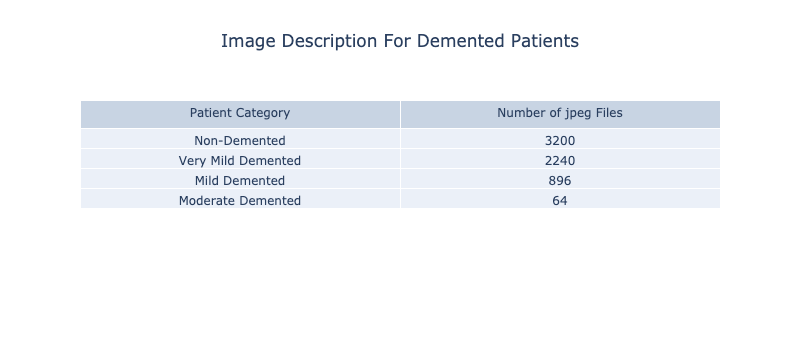

After the images were renamed to maintain a consistent naming scheme, they were split into training, validation, and testing sets.

The average image was then visualized for each class. Figures 1316 displays these average images.

#### Figure 13: Average Non-Demented MRI Image

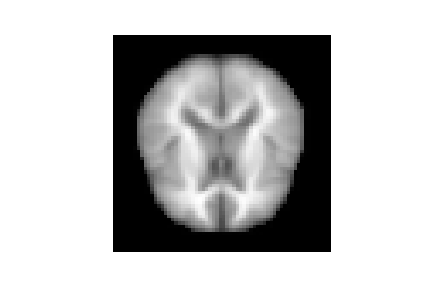

#### Figure 14: Average Very Mild Demented MRI Image

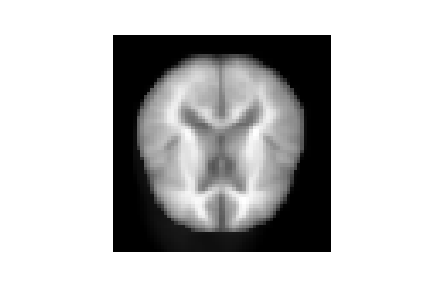

#### Figure 15: Average Mild Demented MRI Image

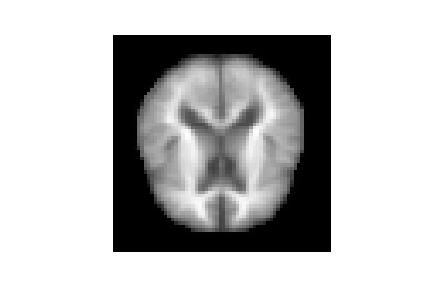

#### Figure 15: Average Moderate Demented MRI Image

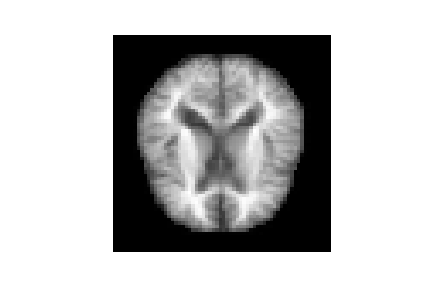

It appears as if more "gray" areas and less "white" areas are displayed in the images, especially in the periphery, as the disease progresses from normal to moderate dementia.

Below, principal component analysis (PCA) was used to look at which images best describe the 4 classes. This performs a reduction in dimensions, as the resulting images will encompass a subset of the images in each class that represent the training images for each class. These are called eigenimages, which are eigenvectors of an image that will be used to generate the covariance matrix.

The principal components that represent 70% of the variability in each class will be given below.

#### Figure 15: Principal Component Analysis representing Non-Demented MRI Images

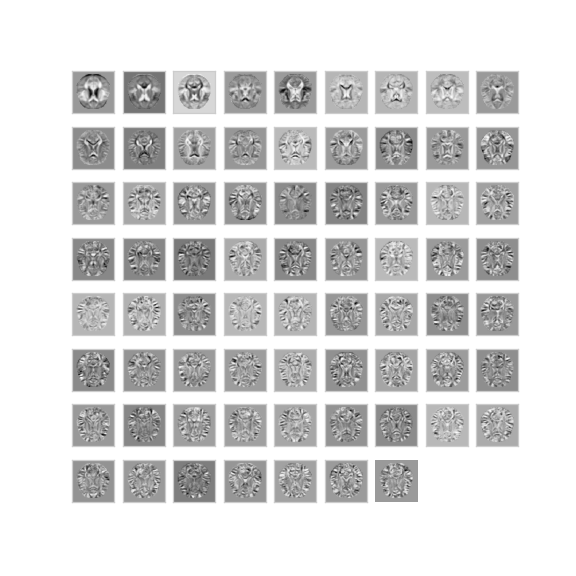

#### Figure 16: Principal Component Analysis representing Very Mild Demented MRI Images

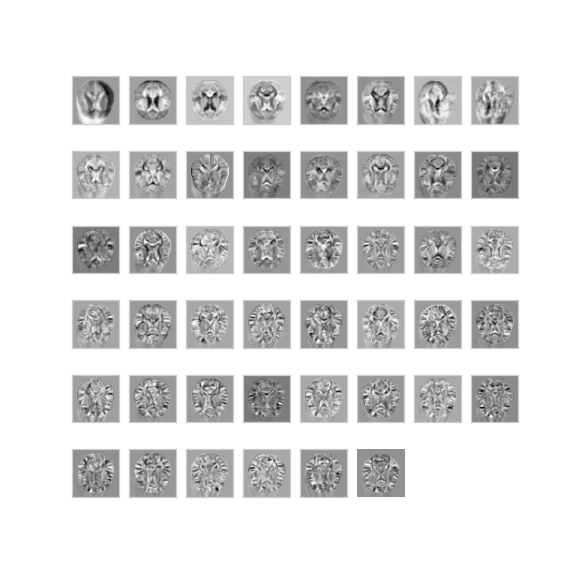

#### Figure 17: Principal Component Analysis representing Mild Demented MRI Images

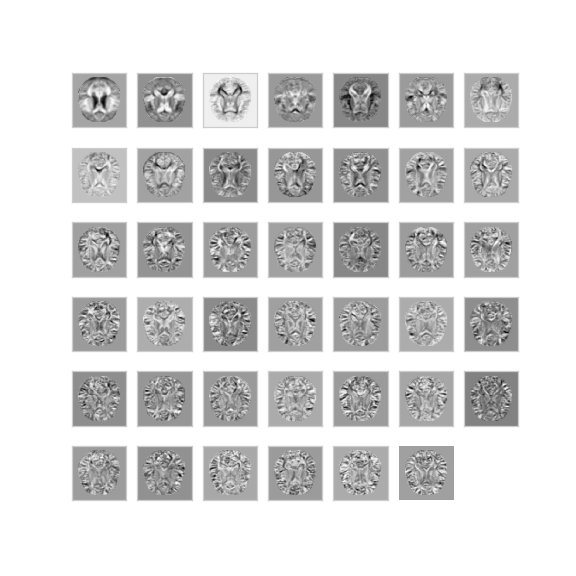

#### Figure 18: Principal Component Analysis representing Moderate Demented MRI Images

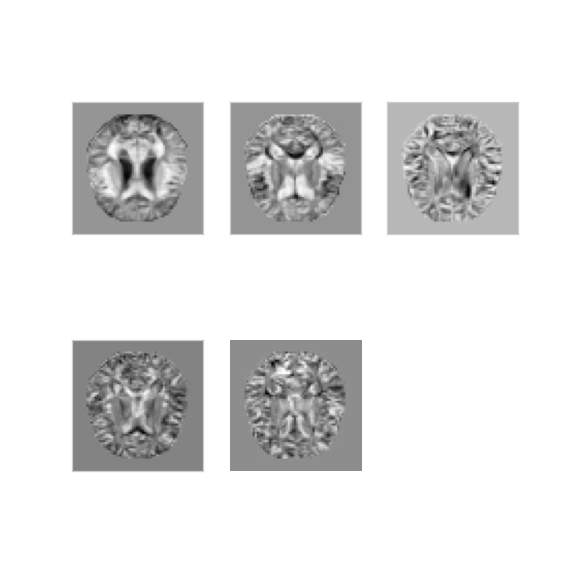

There is a class imbalance with the image dataset, which can ultimately affect the accuracy score of the model as the classes with more images will have high accuracy, yet the model will not learn from the classes with fewer images. Thus, image augmentation was performed on the training images, where random over-sampling was performed. Note that downsampling (under-sampling) where images are removed from the dataset to balance the classes was not performed.

The images were altered in 3 different ways:
1. rotating the image at random from -10 to +10 degrees
2. flipping the images around the left/right axes (switching left and right sides)  
3. Blurring the images using the bilateral filter at random. This preserves edges by using 2 Gaussian functions:
    a. space - blurs only pixels near each other
    b. intensity - blurs only pixels that have intensities similar to the central pixel

### Modeling to predict Alzheimer's Stage - c

Using MRI images of participants that have been classified as either Non-demented, Very Mild Demented, Mild Demented, or Moderate demented, a model was generated to attempt to predict which stage of Alzhiemer's disease a patient can be classified as.

The following model was generated:
1. Convolutional Neural Netowrk (CNN) - a neural network that can detect patterns in images

The CNN is based on layers that receive input from the previous layer and then transform the data. This output is then passed on to the next layer as its input. The transformation began with a lower filter of 32 and increased to 64 with the deeper layers with a kernel size of 3x3 (see Figure 19)

ReLu activation was utilized, where if the input is positive, it will output the input; otherwise, it will output 0, as negative values aren't passed to next layer.

#### Figure 19: CNN Model Summary

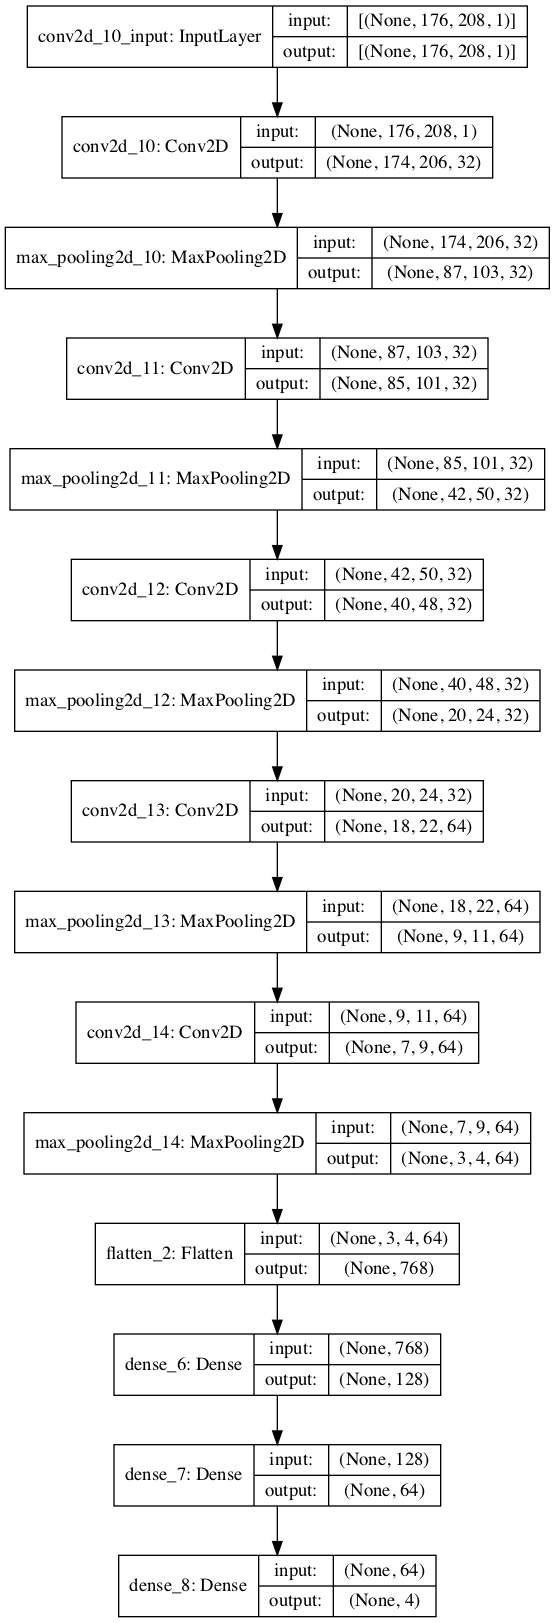

To avoid over-fitting, EarlyStopping was used to stop the epochs based on minimum val_loss metric.

The patience parameter was set to 3 so that after getting to the minimum val_loss, if val_loss increased in any of the next 3 iterations, training would stop at that epoch.

The EarlyStopping stopped at the 15th epoch.

The val_loss was 19.53%

The val_accuracy was 95.72%

Figure 20 illustrates the the loss and accuracy throughout epochs for the training and validation sets.

#### Figure 20: Loss and Accuracy Throughout the Epochs

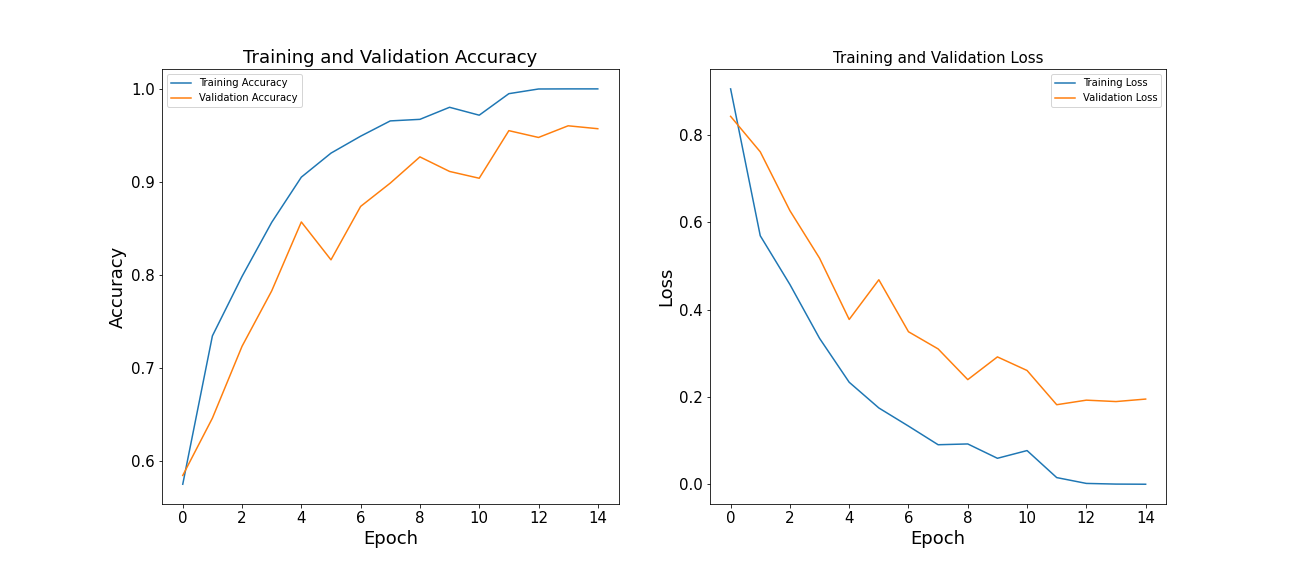

When the test images were examined with the model, the accuracy was 95.94%.'

Table 6 provides the model metrics for the CNN model.

#### Table 6: CNN Model Metrics

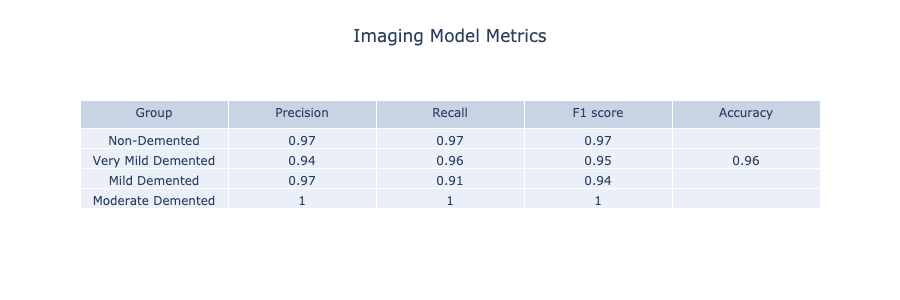

This model performs well for predicting which stage of Alzheimer's a participant is affected by based on MRI images. Thus, it can be recommended to predict Alzheimer's stage.

## <u>Future Directions and Recommendations </u>

The analyses and findings described above provide models for predicting whether a participant has Alzheimer's Disease as well as which stage of Alzheimer's a participant is affected by. In addition, the features that influence the classification of Alzheimer's Disease or not were identified.

The following models are recommended for the respective classification:
    a. KNN Model for predicting which clinical dementia rating group a participant is classified as being based on clinical and MRI imaging values.
    b. One vs. Rest (Multi-Layer Perceptron) Model for predicting which group (Non-Demented, Demented, or Converted) a participant is classified as being based on clinical and MRI imaging values.
    c. CNN Model for predicting the stage of Alzheimer's Disease a participant is affected by based on MRI images.

While the datasets provide clinical and MRI imaging measurements as well as images, the following could enhance the sudy further:
    a. More participants with a CDR of 2 and 3. Because very few participants had a CDR of 2 and no participants had a CDR of 3, they were not included in the analyses.
    b. More participants in the Converted group of participants. The model could then be expanded to try to predict which participants will develop Alzheimer's Disease over a particular time frame.
    c. More participants affected by Moderate classification. The Moderate Demented group consisted of fewer MRI images than the other groups, so it would enhance the model to have more images. In addition, it would be interesting to include follow up imaging analyses on the groups.

In the image dataset, only one model was tested. Although this model displayed high accuracy, it would be worth testing other models such as Xception or ResNet50.


The findings from the analyses described could prove to be useful for future studies, including:
* providing physician’s, researchers, and patients with predictions of Alzheimer's Disease and classification of the stage of Alzheimer's Disease.
* academic or pharmaceutical researchers could utilize the image analyses to determine if their drug(s) of interest can slow the progression of Alzheimer's disease using MRI images as their experimental output.